# Extra exercise:

To help understand and explore new concepts, you can simulate fake
datasets in Python. The advantage of this is that you “play God” because you
actually know the underlying truth, and you get to see how good your
model is at recovering the truth.

Once you’ve better understood what’s going on with your fake dataset,
you can then transfer your understanding to a real one. We’ll show
you how to simulate a fake dataset here, then we’ll give you some ideas
for how to explore it further:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline

/home/archon/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Simulating fake data
# from a normal distribution simulate
# 1000 values with a mean of 5 and
# standard deviation of 7
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.norm.html
x_1 = scs.norm.rvs(loc=5, scale=np.sqrt(10), size=1000, random_state=None)

In [3]:
true_error = scs.norm.rvs(loc=0, scale=np.sqrt(50), size=1000, random_state=None)

In [4]:
true_beta_0 = 10.1
true_beta_1 = -8.2

In [5]:
y = true_beta_0 + true_beta_1*x_1 + true_error

(array([  12.,   44.,   98.,  177.,  203.,  215.,  141.,   73.,   29.,    8.]),
 array([-107.4287775 ,  -91.77253998,  -76.11630246,  -60.46006494,
         -44.80382741,  -29.14758989,  -13.49135237,    2.16488515,
          17.82112267,   33.47736019,   49.13359771]),
 <a list of 10 Patch objects>)

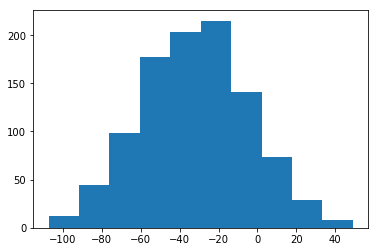

In [6]:
plt.hist(y)

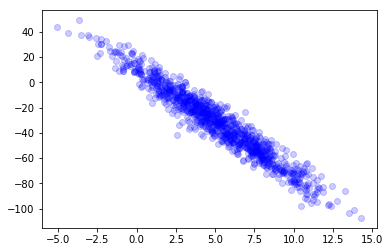

In [8]:
# This is the graph of the y we want to predict:
plt.scatter(x_1, y, c='b', alpha=0.2)
plt.show()

**1.** Build a regression model and see that it recovers the true values of the βs.

In [15]:
lm = sm.OLS(y, x_1).fit()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 2.055e+04
Date:                Sun, 16 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:35:10   Log-Likelihood:                -3620.5
No. Observations:                1000   AIC:                             7243.
Df Residuals:                     999   BIC:                             7248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.8366      0.048   -143.337      0.000      -6.930      -6.743
==============================================================================
Omnibus:                        5.140   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.216
Skew:                          -0.064   Prob(JB):                        0.121
Kurtosis:                       2.709   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2.** Simulate another fake variable x_2 that has a Gamma distribution with parameters you pick. Now make the truth be that y is a linear combination of both x_1 and x_2. Fit a model that only depends on x_1. Fit a model that only depends on x_2. Fit a model that uses both. Vary the sample size and make a plot of mean square error of the training set and of the test set versus sample size

In [21]:
x_2 = scs.gamma.rvs(a=1.99, size=1000)
x_2[0:100]

y_x1_x2 = 10*x_1 + 20*x_2

In [22]:
lm_x1 = sm.OLS(y_x1_x2, x_1).fit()
lm_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     8196.
Date:                Sun, 16 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:48:30   Log-Likelihood:                -4914.5
No. Observations:                1000   AIC:                             9831.
Df Residuals:                     999   BIC:                             9836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.7494      0.174     90.533      0.000      15.408      16.091
==============================================================================
Omnibus:                       90.480   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.860
Skew:                           0.743   Prob(JB):                     2.55e-26
Kurtosis:                       3.786   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm_x2 = sm.OLS(y_x1_x2, x_2).fit()
lm_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     4821.
Date:                Sun, 16 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:48:48   Log-Likelihood:                -5143.2
No. Observations:                1000   AIC:                         1.029e+04
Df Residuals:                     999   BIC:                         1.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            38.1688      0.550     69.430      0.000      37.090      39.248
==============================================================================
Omnibus:                       15.039   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.466
Skew:                          -0.305   Prob(JB):                     0.000438
Kurtosis:                       2.997   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df = pd.DataFrame({'y': y_x1_x2, 'x_1': x_1, 'x_2': x_2 })
df[0:100]

lm_x1_x2 = sm.formula.ols(formula='y ~ x_1 + x_2', data=df).fit()
lm_x1_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.391e+33
Date:                Sun, 16 Jul 2017   Prob (F-statistic):               0.00
Time:                        12:53:37   Log-Likelihood:                 29871.
No. Observations:                1000   AIC:                        -5.974e+04
Df Residuals:                     997   BIC:                        -5.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.665e-14    1.9e-15     14.042      0.000    2.29e-14    3.04e-14
x_1           10.0000   2.57e-16   3.89e+16      0.000      10.000      10.000
x_2           20.0000   6.11e-16   3.27e+16      0.000      20.000      20.000
==============================================================================
Omnibus:                       75.914   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.426
Skew:                           0.622   Prob(JB):                     3.48e-23
Kurtosis:                       3.966   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.** Create a new variable, z, that is equal to x_1^2 (x_1 squared). Include this as one of the predictors in your model. See what happens when you fit a model that depends on x1 only and then also on z. Vary the sample size and make a plot of mean square error of the training set and of the test set versus sample size

In [48]:
z = x_1**2

df['z'] = z
# df[:10]
lm_z = sm.formula.ols(formula='y ~ z', data=df).fit()
lm_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 16 Jul 2017   Prob (F-statistic):          7.48e-165
Time:                        13:05:32   Log-Likelihood:                -4805.4
No. Observations:                1000   AIC:                             9615.
Df Residuals:                     998   BIC:                             9625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.8601      1.348     42.911      0.000      55.214      60.506
z              0.9022      0.027     33.407      0.000       0.849       0.955
==============================================================================
Omnibus:                      127.578   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.871
Skew:                           0.803   Prob(JB):                     7.36e-51
Kurtosis:                       4.720   Cond. No.                         72.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm_x1_z = sm.formula.ols(formula='y ~ x_1 + z', data=df).fit()
lm_x1_z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     795.1
Date:                Sun, 16 Jul 2017   Prob (F-statistic):          3.61e-207
Time:                        13:06:11   Log-Likelihood:                -4703.9
No. Observations:                1000   AIC:                             9414.
Df Residuals:                     997   BIC:                             9428.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8922      1.856     19.875      0.000      33.250      40.535
x_1           10.2858      0.687     14.978      0.000       8.938      11.633
z              0.0314      0.063      0.498      0.619      -0.092       0.155
==============================================================================
Omnibus:                      222.309   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.654
Skew:                           1.274   Prob(JB):                     1.69e-97
Kurtosis:                       5.049   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4.** Play around more by (a) changing parameter values (the true βs), (b) changing the distribution of the true error, and (c) including
more predictors in the model with other kinds of probability distributions. (rnorm() means randomly generate values from a normal distribution. rbinom() does the same for binomial. So lookup these functions online and try to find more.)

**5.** Create scatterplots of all pairs of variables and histograms of single variables.

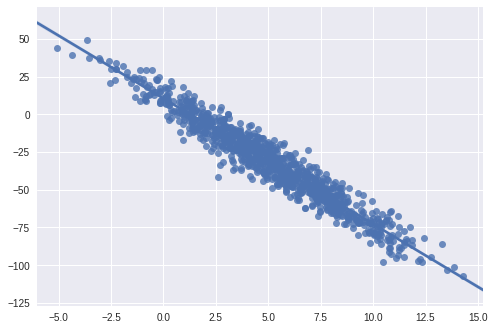

In [17]:
import seaborn as sns
sns.regplot(x_1, y)

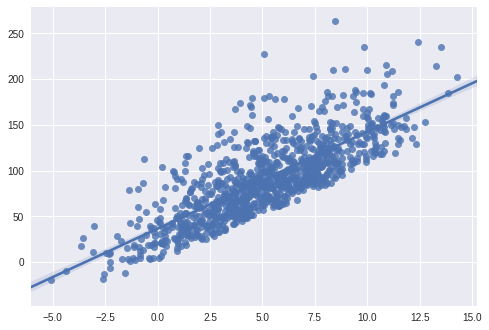

In [29]:
sns.regplot(x_1, y_x1_x2)

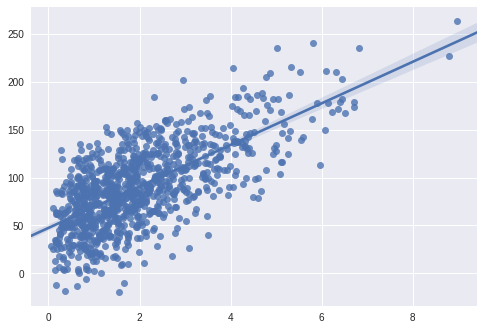

In [30]:
sns.regplot(x_2, y_x1_x2)

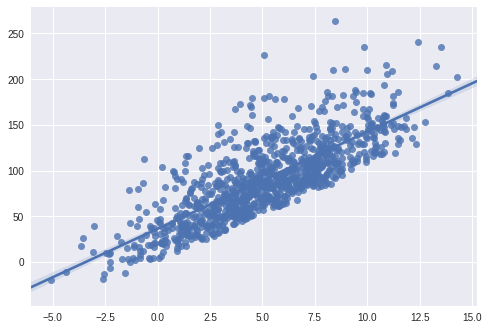

In [31]:
sns.regplot(x_1, y_x1_x2)

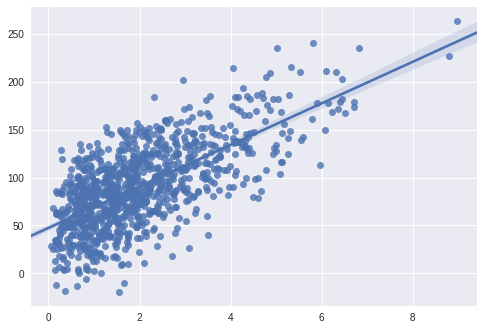

In [32]:
sns.regplot(x_2, y_x1_x2)

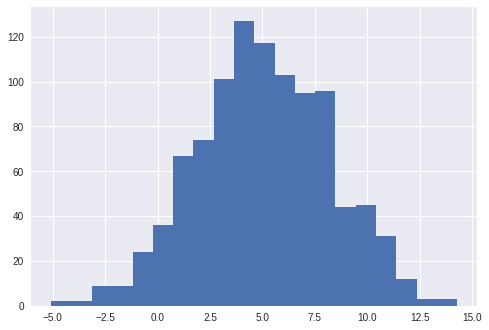

In [43]:
df['x_1'].hist(bins=20)

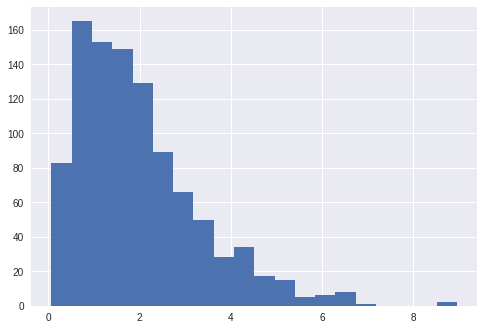

In [42]:
df['x_2'].hist(bins=20)

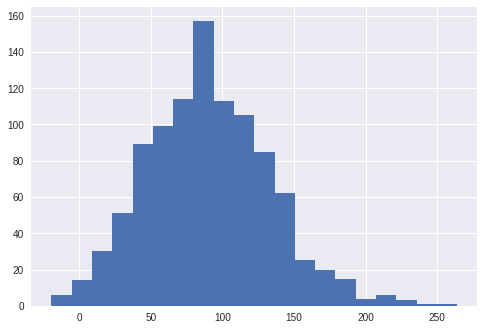

In [41]:
df['y'].hist(bins=20)